## imports

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
import json
data_pth = Path('../data/')

## Constants

In [3]:
NIU = 99999999
with open(data_pth / 'cpi99_cons.json') as fin:
    cpi99_cons = json.load(fin)

Drop useless columns

In [4]:
raw_data = pd.read_csv('../data/beginner.csv')
simple_data = raw_data[[
    'YEAR', 'SERIAL', 'REGION', 'NFAMS', 'PERNUM', 
    'RACE', 'AGE', 'SEX', 'EMPSTAT', 'OCC', 'UHRSWORKT', 
    'WKSTAT', 'JOBCERT', 'EDUC', 'INCWAGE', 'OINCWAGE']]
simple_data.to_csv('../data/simple_data.csv', index=False)

In [102]:
raw_data.columns

Index(['YEAR', 'SERIAL', 'MONTH', 'HWTFINL', 'CPSID', 'ASECFLAG', 'HFLAG',
       'ASECWTH', 'REGION', 'STATEFIP', 'NFAMS', 'PERNUM', 'WTFINL', 'CPSIDP',
       'ASECWT', 'AGE', 'SEX', 'RACE', 'MARST', 'BPL', 'EMPSTAT', 'OCC',
       'UHRSWORKT', 'WKSTAT', 'JOBCERT', 'EDUC', 'EDDIPGED', 'INCWAGE',
       'OINCWAGE'],
      dtype='object')

In [5]:
incwage = simple_data['INCWAGE']
print('total reports:', len(incwage))
print('number of 0 wage:', np.count_nonzero(incwage == 0))
print('number of N.I.U wage:', np.count_nonzero(incwage == 99999999))
print('number of ? wage:', np.count_nonzero(incwage == 99999998))
print('number of NaN wage:', np.count_nonzero(incwage.isna()))
print('number of readable wage:', np.count_nonzero((incwage > 0) & (incwage < 99999998)))


total reports: 54737
number of 0 wage: 7496
number of N.I.U wage: 5543
number of ? wage: 0
number of NaN wage: 30160
number of readable wage: 11538


In [6]:
filtered = simple_data[(simple_data['INCWAGE'] >= 0) & (simple_data['INCWAGE'] < NIU)].reset_index(drop=True)

filtered_nonzero = filtered[filtered['INCWAGE'] > 0].reset_index(drop=True)


In [78]:
import seaborn as sns

def corr_heatmap(df):
    corr = df.corr()
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)


In [63]:
# per individual

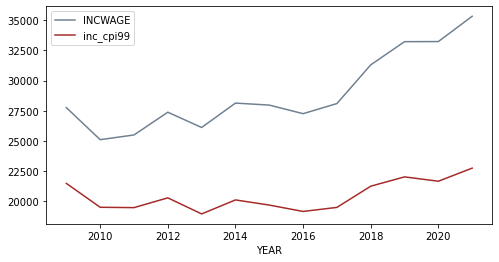

In [23]:
def clean_wage(df):
    # df['OINCWAGE'] = df['OINCWAGE'].replace(np.nan, 0).replace(99999999, 0).replace(99999998, 0)
    # df['inc_salary'] = df['INCWAGE'] - df['OINCWAGE']
    plt.rcParams["figure.figsize"] = (8,4)
    df['cpi99'] = df['YEAR'].apply(lambda yr : cpi99_cons[str(yr)])
    df['inc_cpi99'] = df['INCWAGE'] * df['cpi99']

    df.groupby('YEAR').mean()['INCWAGE'].plot(legend=True, color='slategrey')
    df.groupby('YEAR').mean()['inc_cpi99'].plot(legend=True, color='brown')

# clean_wage(filtered_nonzero)
clean_wage(filtered)
plt.savefig('incwage_cpi99.png')


In [42]:
def display_categ(df, indices):
    
    fig, axs = plt.subplots(5, 2, figsize=(20, 20), constrained_layout=False)

    for i in range(len(indices)):
        ax = axs.flat[i]
        it = indices[i]
        ser = df.groupby(it).mean()['inc_cpi99']
        ax.bar(list(map(str, ser.index)), ser.values.tolist(), color='slategrey')
        
        ax.set_ylabel("mean income")
        ax.set_xlabel(f"label of {it}")
    
    return fig, axs

# fig, axs = display_categ(
#     filtered,
#     ['REGION', 'RACE', 'AGE', 'SEX', 'EMPSTAT', 'OCC', 'UHRSWORKT', 'WKSTAT', 'EDUC'])
# fig.savefig('factors_vs_inc.png')

In [27]:
def display_sd(df):
    indices = ['REGION', 'RACE', 'AGE', 'SEX', 'EMPSTAT', 'OCC', 'UHRSWORKT', 'WKSTAT', 'EDUC']
    
    # fig, axs = plt.subplots(5, 2, figsize=(20, 20), constrained_layout=False)

    for i in range(len(indices)):
        # ax = axs.flat[i]
        it = indices[i]
        ser = df.groupby(it).var()['inc_cpi99']
        print(ser)
        # ax.bar(list(map(str, ser.index)), ser.values.tolist(), color='slategrey')
        
        # ax.set_ylabel("mean income")
        # ax.set_xlabel(f"label of {it}")
    
    # return fig, axs
display_sd(filtered)

# fig, axs = display_categ(filtered)
# fig.savefig('factors_vs_inc.png')

REGION
11    1.259110e+09
12    1.622333e+09
21    1.399939e+09
22    8.466359e+08
31    1.577476e+09
32    1.550030e+09
33    1.247618e+09
41    1.128431e+09
42    1.296923e+09
Name: inc_cpi99, dtype: float64
RACE
100    1.423349e+09
200    7.705667e+08
300    3.180784e+08
651    1.830177e+09
652    3.597393e+08
801    3.704208e+08
802    4.017370e+08
803    6.596441e+08
804    2.836186e+08
805    2.265639e+08
806    4.711850e+08
809    1.128192e+09
810    1.567742e+08
811    7.546612e+08
812    4.565033e+08
813    5.036693e+08
817             NaN
Name: inc_cpi99, dtype: float64
AGE
15    1.373562e+06
16    3.393203e+06
17    1.223259e+07
18    2.609147e+07
19    4.717225e+07
          ...     
77    1.577180e+08
78    6.404919e+07
79    2.348167e+07
80    9.169478e+07
85    6.079227e+07
Name: inc_cpi99, Length: 67, dtype: float64
SEX
1    1.985063e+09
2    6.704643e+08
Name: inc_cpi99, dtype: float64
EMPSTAT
1     6.686589e+08
10    1.775668e+09
12    1.926443e+09
21    3.349509e+08


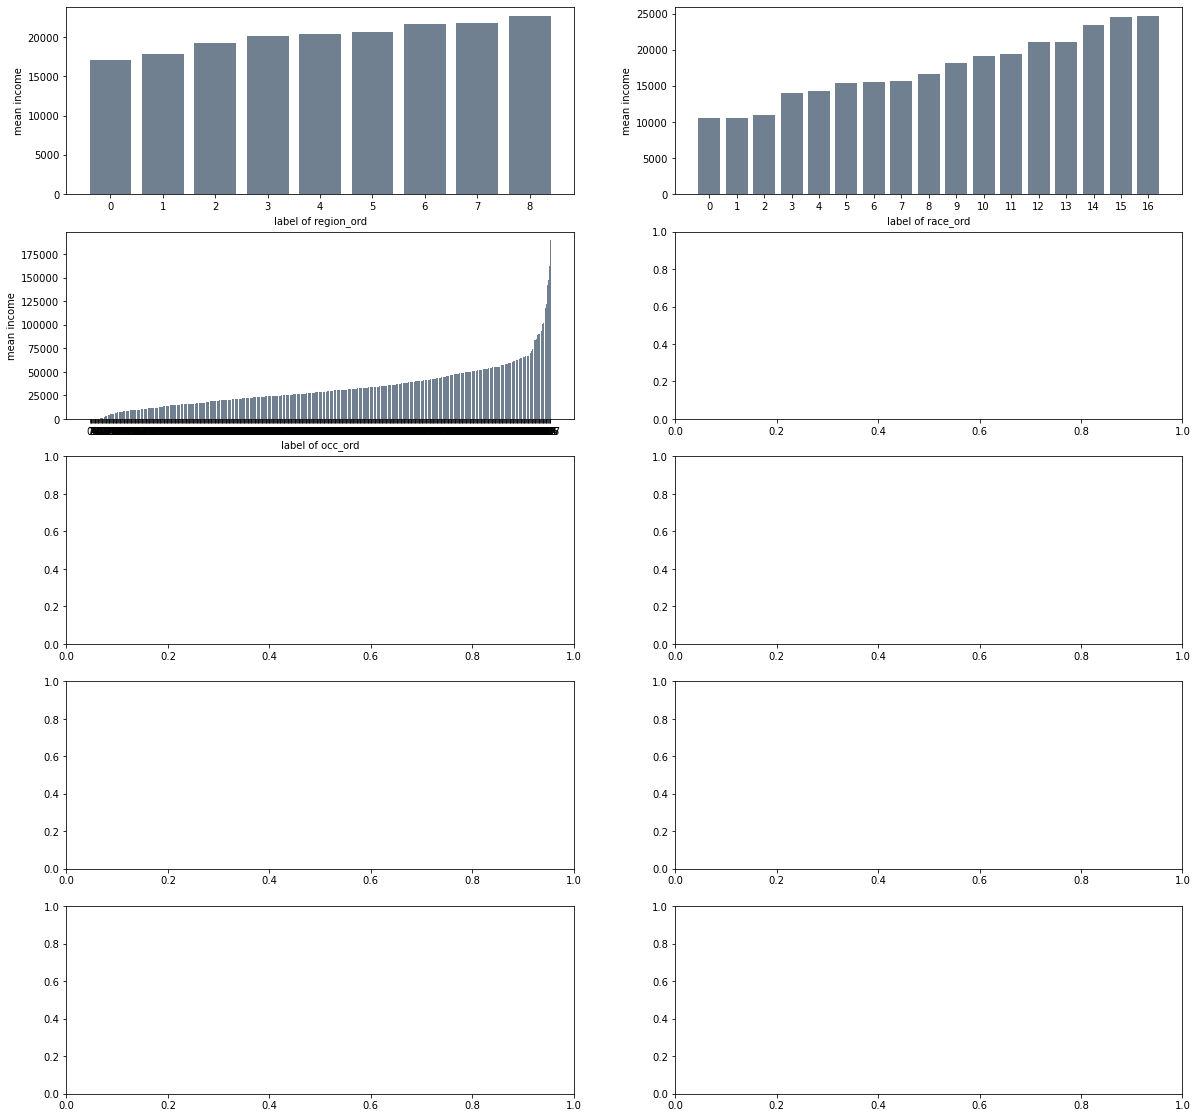

In [43]:
ser = filtered.groupby('REGION').mean()['inc_cpi99'].sort_values()
region_ord = ser.reset_index()['REGION']
region_ord = {region_ord.loc[i] : i  for i in region_ord.index}
filtered['region_ord'] = filtered['REGION'].apply(lambda x : region_ord[x])

ser = filtered.groupby('RACE').mean()['inc_cpi99'].sort_values()
race_ord = ser.reset_index()['RACE']
race_ord = {race_ord.loc[i] : i  for i in race_ord.index}
filtered['race_ord'] = filtered['RACE'].apply(lambda x : race_ord[x])

ser = filtered.groupby('OCC').mean()['inc_cpi99'].sort_values()
occ_ord = ser.reset_index()['OCC']
occ_ord = {occ_ord.loc[i] : i  for i in occ_ord.index}
filtered['occ_ord'] = filtered['OCC'].apply(lambda x : occ_ord[x])

# fig, axs = display_categ(
#     filtered,
#     ['region_ord', 'race_ord', 'occ_ord'])
# fig.savefig('factors_vs_inc_ord.png')

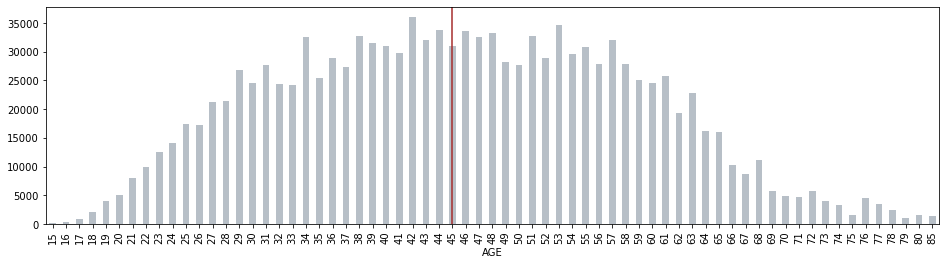

In [47]:
def age_score(df):
    salary_vs_age = df[['AGE', 'inc_cpi99']]
    plt.rcParams["figure.figsize"] = (16,4)

    mean_inc_by_age = df.groupby('AGE').mean()['inc_cpi99']
    mean_inc_by_age.plot(kind='bar', color='slategrey', alpha=.5)
    
    age_lst = mean_inc_by_age.index.tolist()

    l = np.min(age_lst)
    r = np.max(age_lst)
    while l <= r:
        mid = (l + r) >> 1
        lower = mean_inc_by_age.iloc[:mid].sum()
        upper = mean_inc_by_age.iloc[mid:].sum()
        if lower >= upper:
            r = mid - 1
        else:
            l = mid + 1
    
    plt.axvline(r, color='brown')
    plt.savefig('age_centered.png')
age_score(filtered)
    

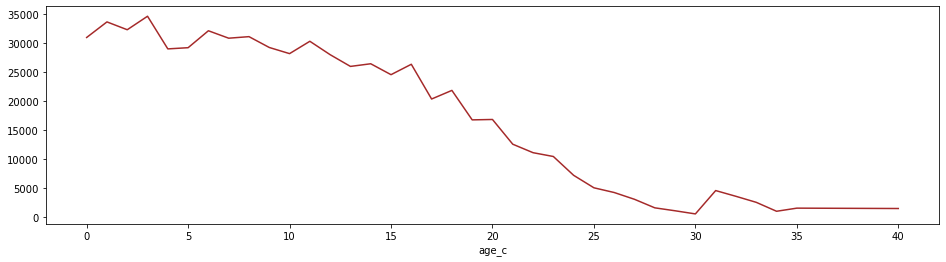

In [52]:
filtered['age_c'] = abs(filtered['AGE'] - 45)
# filtered_nonzero['age_c'] = abs(filtered_nonzero['AGE'] - 40)
filtered.groupby('age_c').mean()['inc_cpi99'].plot(color='brown')
plt.savefig('age_centered_plot.png')
# corr_heatmap(filtered)

In [54]:
def least_squares_regression(X, y):
    """ Find the least squares regression plane using the normal equations """
    return np.linalg.solve(X.T @ X, X.T @ y)
    
def mse_with_vars(df, ob, vars, f=None) :    
    data = df.get(vars).values.tolist()

    # design_mat = []
    # for row in data:
    #     mat_row = [1]
    #     for i in range(len(row)):
    #         mat_row.append(row[i])
    #     design_mat.append(mat_row)
    # design_mat = np.array(design_mat)

    design_mat = np.array([[1, *row] for row in data])
    observ_vec = np.array(df[ob].values)

    print(type(design_mat))
    w = least_squares_regression(design_mat, observ_vec)

    err_vec = observ_vec - design_mat @ w
    mse = np.dot(err_vec, err_vec) / len(data)

    return w, mse

In [138]:
filtered

,YEAR,SERIAL,REGION,NFAMS,PERNUM,RACE,AGE,SEX,EMPSTAT,OCC,UHRSWORKT,WKSTAT,JOBCERT,EDUC,INCWAGE,OINCWAGE,cpi99,inc_cpi99,age_c
0,2015,16566,12,1,1,100,31,1,10,1910,50,11,NaN,111,100000.0,0.0,0.704,70400.00,9
1,2019,94327,42,1,2,651,37,2,36,0,999,99,NaN,73,0.0,0.0,0.663,0.00,3
2,2011,14553,12,1,1,100,80,2,36,0,999,99,NaN,73,0.0,0.0,0.764,0.00,40
3,2018,31356,22,1,3,100,19,2,34,0,999,99,NaN,81,0.0,0.0,0.679,0.00,21
4,2010,7632,11,1,3,805,19,1,10,5260,5,41,NaN,81,1500.0,500.0,0.777,1165.50,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19029,2010,26995,21,1,1,100,45,1,10,5510,40,11,NaN,73,0.0,0.0,0.777,0.00,5
19030,2009,29193,21,1,1,100,71,1,36,0,999,99,NaN,73,0.0,0.0,0.774,0.00,31
19031,2015,56900,31,1,2,100,33,2,10,4720,40,11,NaN,81,16640.0,0.0,0.704,11714.56,7
19032,2009,80172,41,1,1,651,78,1,36,0,999,99,NaN,111,0.0,0.0,0.774,0.00,38


In [53]:
filtered

,YEAR,SERIAL,REGION,NFAMS,PERNUM,RACE,AGE,SEX,EMPSTAT,OCC,...,JOBCERT,EDUC,INCWAGE,OINCWAGE,cpi99,inc_cpi99,age_c,region_ord,race_ord,occ_ord
0,2015,16566,12,1,1,100,31,1,10,1910,...,NaN,111,100000.0,0.0,0.704,70400.00,14,6,13,366
1,2019,94327,42,1,2,651,37,2,36,0,...,NaN,73,0.0,0.0,0.663,0.00,8,3,15,19
2,2011,14553,12,1,1,100,80,2,36,0,...,NaN,73,0.0,0.0,0.764,0.00,35,6,13,19
3,2018,31356,22,1,3,100,19,2,34,0,...,NaN,81,0.0,0.0,0.679,0.00,26,4,13,19
4,2010,7632,11,1,3,805,19,1,10,5260,...,NaN,81,1500.0,500.0,0.777,1165.50,26,8,1,182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19029,2010,26995,21,1,1,100,45,1,10,5510,...,NaN,73,0.0,0.0,0.777,0.00,0,5,13,168
19030,2009,29193,21,1,1,100,71,1,36,0,...,NaN,73,0.0,0.0,0.774,0.00,26,5,13,19
19031,2015,56900,31,1,2,100,33,2,10,4720,...,NaN,81,16640.0,0.0,0.704,11714.56,12,7,13,67
19032,2009,80172,41,1,1,651,78,1,36,0,...,NaN,111,0.0,0.0,0.774,0.00,33,2,15,19


In [55]:
mse_with_vars(
    filtered, 'inc_cpi99',
    ['region_ord', 'race_ord', 'age_c', 'SEX', 'EMPSTAT', 'occ_ord', 'UHRSWORKT', 'WKSTAT', 'EDUC']
)

<class 'numpy.ndarray'>


(array([ 8.72228854e+02,  2.04811704e+02,  2.45518832e+02, -2.56547011e+02,
        -5.45191102e+03,  3.09293242e+02,  8.93171050e+01,  2.76527878e-01,
        -1.32927802e+02,  1.43378040e+02]),
 879818925.1034607)

In [145]:
occ = np.unique(filtered['OCC'])
print(occ)

for x in occ:
    res = mse_with_vars(
        filtered[filtered['OCC'] == x], 
        ['WKSTAT', 'UHRSWORKT', 'EMPSTAT', 'SEX', 'age_c', 'EDUC'], 
        [lambda x : x for i in range(6)]
    )
    print(res)

[   0   10   20   40   50   51   52   60  100  110  120  130  136  137
  140  150  160  200  205  210  220  230  300  310  325  330  340  350
  360  410  420  425  430  440  500  510  520  530  540  560  565  600
  620  630  640  650  700  705  710  720  725  726  730  735  740  750
  800  810  820  830  840  845  850  860  900  910  930  940  950  960
 1000 1005 1006 1007 1010 1020 1021 1030 1040 1050 1060 1100 1105 1106
 1107 1108 1110 1200 1220 1230 1240 1300 1305 1310 1320 1340 1350 1360
 1400 1410 1420 1430 1440 1450 1460 1500 1520 1530 1540 1545 1550 1551
 1555 1560 1610 1640 1650 1700 1710 1720 1740 1745 1760 1800 1810 1820
 1825 1840 1860 1900 1910 1920 1960 1965 1970 2000 2001 2002 2003 2004
 2006 2010 2012 2014 2015 2016 2020 2025 2040 2050 2060 2100 2140 2145
 2150 2160 2180 2200 2205 2300 2310 2320 2330 2340 2350 2360 2400 2430
 2435 2440 2540 2545 2550 2555 2600 2630 2632 2633 2634 2635 2636 2640
 2700 2710 2720 2721 2722 2740 2750 2752 2755 2760 2770 2800 2810 2820
 2825 

LinAlgError: Singular matrix

KeyboardInterrupt: 

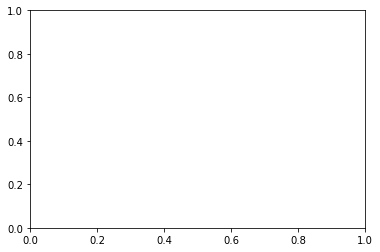

In [154]:
occ_wage = filtered[['OCC', 'INCWAGE']]
occ_wage.sort_values(by='INCWAGE').plot(kind='bar')